In [639]:
import pandas as pd
import numpy
import sklearn as scikit_learn
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split



In [640]:
c_insol = pd.read_csv('Data/data_insolvency.csv')

y = c_insol['Bankrupt?']
X = c_insol.drop(columns=['Bankrupt?'])

## Steps for predicting the insolvency of a company using a working model

1. Feature selection: univariate selection (ANOVA, chi-squared test), dropping columns, scaling (min-max scaling, Standardization), regularisation (L1 Lasso, L2 Ridge)
2. Feature engineering: need to create new variables out of existants? Dummification? new ratios? debt-to-equity ratio, liquidity ratio, profit margin...
3. EDA: clean data (outliers, nans), correlated features, feature selection (drop columns).  
3.1. Missing data: dropping columns? Filling rows? (avg, median, predictives models).  
3.2. Unbalaced? Insolvent companies < solvent companies: SMOTE, XGBoost, etc. ?  
4. Getting variable independant: defining X and y.
5. Model selection: Logistic or Linear regression, Gradient Boosting, Support Vector Machines (SVM), Decision Tree, Random Forest.  
5.1. Cross-validation for testing the model.  
5.2. Model evaluation: matrix confusion, precision, recall, F1-score, ROC-AUC.  
6. Ajusting Overfitting (L1 or L2 in linear models), cross-validation for adjusting hyperparameters, pruning for random forest or gradient boosting.
7. Deployment.

# Some notes about the dataset

*Since the dataset is not described, let's write down some definitions of labels and ratios*

**Definitions:**  
What is ROA?/
ROA(C): Return on Assets before interest and depreciation, and before interest.  
ROA(A): Return on Assets before interest and after tax.  
ROA(B): Return on Assets before interest and depreciation, and after tax. 
Operating Gross Margin: profitability ratio that measures the percentage of revenue remaining after subtracting the cost of goods sold.  
Equity OR net value: the money the company's owners have invested, plus any profits it has kept. Equity = Assets - liabilities.  
Liability: the money the company owes to its creditors, like banks or suppliers.  
Assets: liabilities + equities.  
Working capital (not the same as cash): measure of a company's short-term financial health. It's the money a company has available to fund its day-to-day operations. You can think of it as the liquid assets a business has on hand to pay its current obligations. WC = Current Assets - Current Liabilities.  
Cash reinvestment is a ratio that shows how much of a company's cash flow is being put back into the business to fund growth, such as new equipment, research and development, or acquisitions. A higher percentage suggests that the company is aggressively investing in its future.  
Net value growth rate measures the percentage change in a company's net value (or equity) over a specific period. It shows how effectively the company is increasing the value for its shareholders. A positive growth rate indicates that the company is becoming more valuable over time. Net Value Growth Rate = [(Current Net Value - Previous Net Value) / Previous Net Value] * 100  
Tax rate: the percentage at which a company's profits are taxed by the governement.  
EPS: earnings per share that a company generates consistently from its ongoing, core business activities. EPS = (Net Income - Preferred Dividends) / Number of Outstanding Shares.  

**Some ratios:**  
Debt-to-equity ratio: high ratio (short-term debt to finance its operations) vs. low ratio (more reliant on its own capital/more stable regarding its short-term debts).  
Current and Quick ratio: used to assess a company's ability to pay it's short-term debts. The Current Ratio measures a company's ability to cover its short-term liabilities (debts due within a year) with its short-term assets. The Quick Ratio is a more conservative measure of liquidity. It is similar to the Current Ratio but excludes inventory and other less liquid current assets from the calculation. The logic is that inventory can be difficult to sell quickly at full value.  
The Debt Ratio measures the proportion of a company's assets that are financed by debt. It's a key indicator of a company's financial leverage and solvency. A higher debt ratio means a company relies more on borrowing to fund its operations and asset purchases, which can signal a higher level of financial risk.  
Degree of Financial Leverage (DFL) is a ratio that measures how sensitive a company's earnings per share (EPS) are to changes in its operating income. It helps investors and analysts understand the impact of a company's debt on its profitability. DFL = 1: This indicates the company has no debt. A 1% change in operating income will result in a 1% change in net income. DFL > 1: This shows the company uses debt. A DFL of 1.5, for example, means that a 1% change in operating income will lead to a 1.5% change in net income. The higher the number, the greater the leverage and the more volatile the earnings.  





Metrics grouped in income, outcome and other (balance sheets)

### **Income & Profitability Metrics**
These columns relate to a company's revenue and profitability.
* ROA(C), ROA(A), ROA(B)
* Operating Gross Margin
* Realized Sales Gross Margin
* Operating Profit Rate
* Pre-tax net Interest Rate
* After-tax net Interest Rate
* Non-industry income and expenditure/revenue
* Continuous interest rate (after tax)
* Cash flow rate
* Persistent EPS in the Last Four Seasons
* Cash Flow Per Share
* Revenue Per Share (Yuan ¥)
* Operating Profit Per Share (Yuan ¥)
* Per Share Net profit before tax (Yuan ¥)
* Realized Sales Gross Profit Growth Rate
* Operating Profit Growth Rate
* After-tax Net Profit Growth Rate
* Regular Net Profit Growth Rate
* Continuous Net Profit Growth Rate
* Total Asset Return Growth Rate Ratio
* Operating profit/Paid-in capital
* Net profit before tax/Paid-in capital
* Total Asset Turnover
* Accounts Receivable Turnover
* Average Collection Days
* Inventory Turnover Rate (times)
* Fixed Assets Turnover Frequency
* Net Worth Turnover Rate (times)
* Revenue per person
* Operating profit per person
* Total income/Total expense
* Current Asset Turnover Rate
* Quick Asset Turnover Rate
* Working capital Turnover Rate
* Cash Turnover Rate
* Cash Flow to Sales
* Cash Flow to Total Assets
* Cash Flow to Liability
* CFO to Assets
* Cash Flow to Equity
* Net Income to Total Assets
* Gross Profit to Sales
* Net Income to Stockholder's Equity

### **Outcomes & Expenses**
These columns primarily represent a company's expenses or costs.
* Operating Expense Rate
* Research and development expense rate
* Interest-bearing debt interest rate
* Tax rate (A)
* Interest Expense Ratio
* Allocation rate per person
* Total expense/Assets
* Interest Coverage Ratio (Interest expense to EBIT)

### **Balance Sheet & Other Metrics**
These columns are related to the company's financial position, leverage, or other flags and growth rates.
* Net Value Per Share (B), (A), (C)
* Total Asset Growth Rate
* Net Value Growth Rate
* Cash Reinvestment %
* Current Ratio
* Quick Ratio
* Total debt/Total net worth
* Debt ratio %
* Net worth/Assets
* Long-term fund suitability ratio (A)
* Borrowing dependency
* Contingent liabilities/Net worth
* Inventory and accounts receivable/Net value
* Working Capital to Total Assets
* Quick Assets/Total Assets
* Current Assets/Total Assets
* Cash/Total Assets
* Quick Assets/Current Liability
* Cash/Current Liability
* Current Liability to Assets
* Operating Funds to Liability
* Inventory/Working Capital
* Inventory/Current Liability
* Current Liabilities/Liability
* Working Capital/Equity
* Current Liabilities/Equity
* Long-term Liability to Current Assets
* Retained Earnings to Total Assets
* Fixed Assets to Assets
* Current Liability to Liability
* Current Liability to Equity
* Equity to Long-term Liability
* Current Liability to Current Assets
* Liability-Assets Flag
* Total assets to GNP price
* No-credit Interval
* Liability to Equity
* Degree of Financial Leverage (DFL)
* Net Income Flag
* Equity to Liability

In [641]:
c_insol.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [642]:
print("\n--- Data Types ---")
print(c_insol.dtypes)


--- Data Types ---
Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object


In [643]:
# There's 95 possible features... and 6819 rows
# Bankrupt is the only categorical variable, all the others are numerical. 
## This implies that we need to use ANOVA instead of chi-square for the feature selection.

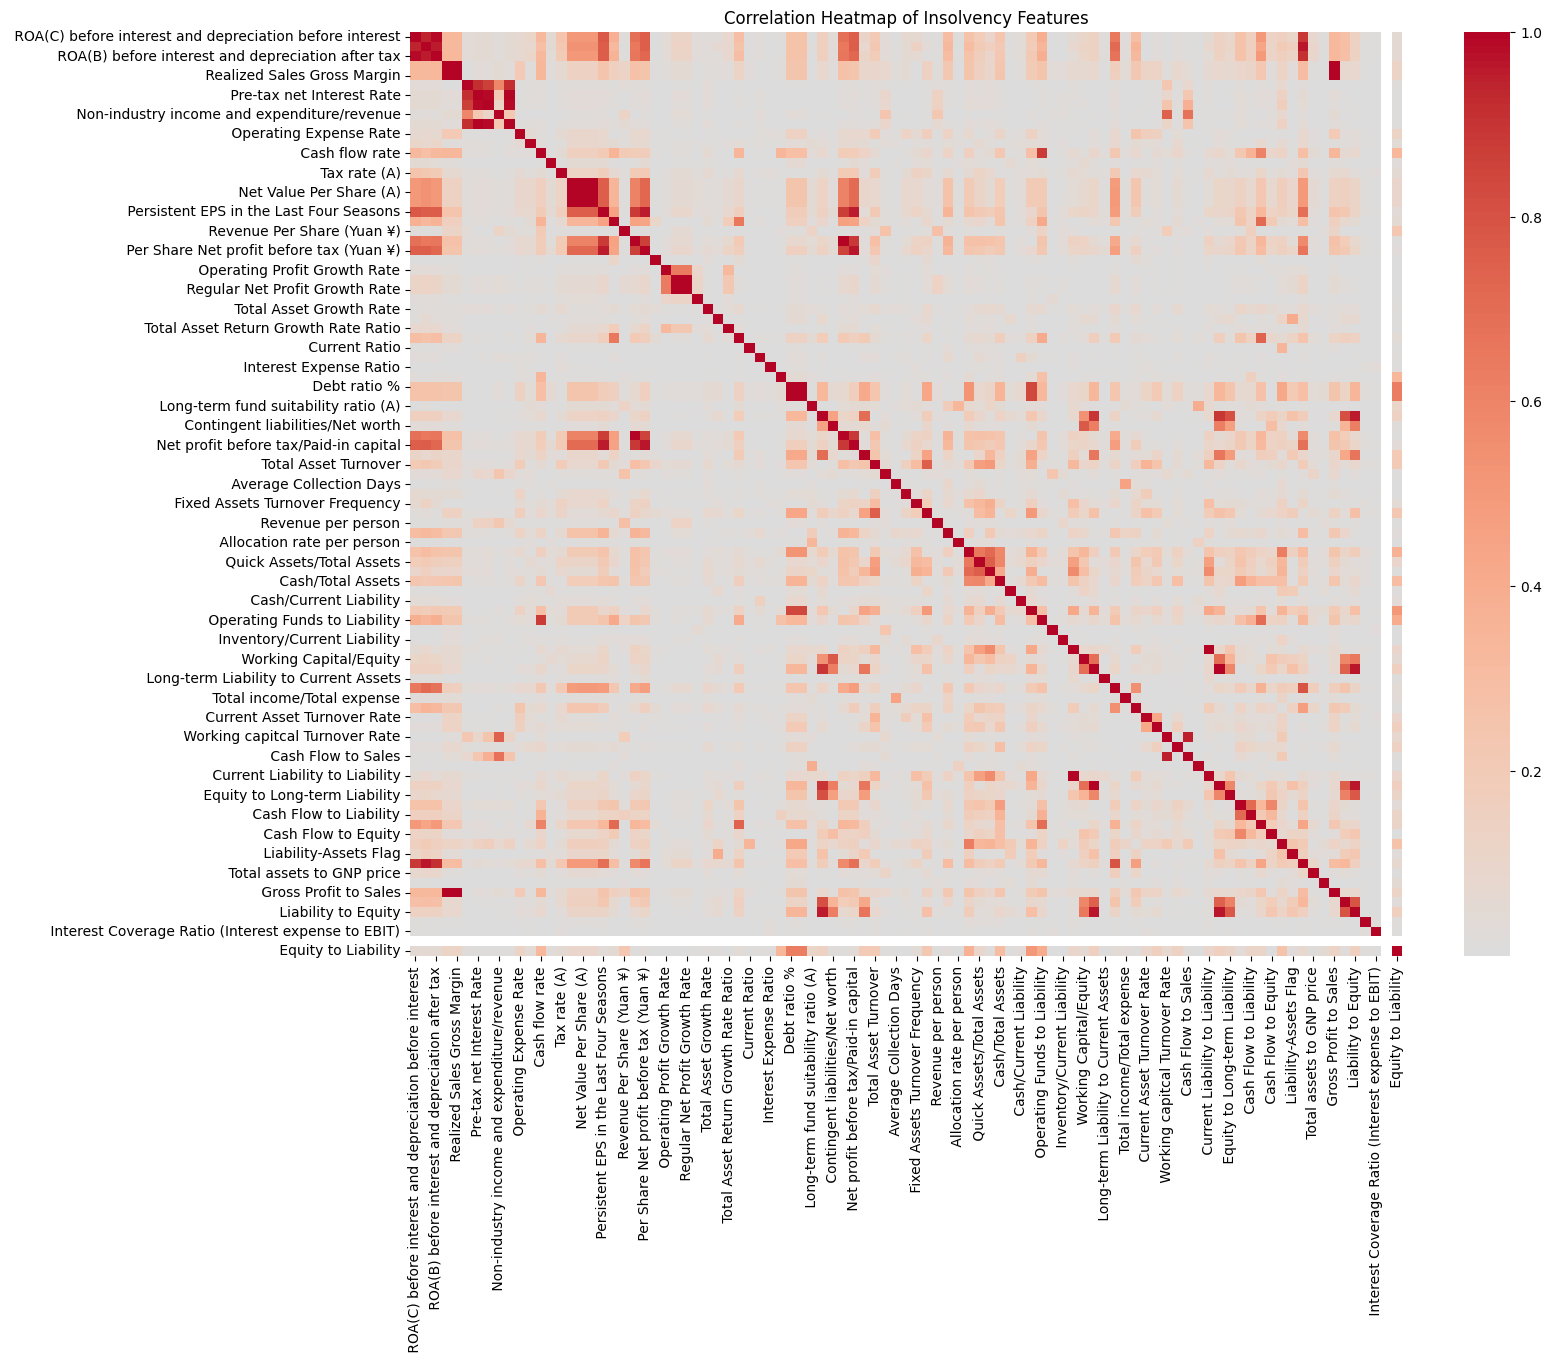

In [644]:
# A correlation heatmap so I can choose the best feature to implement with ANOVA

# Calculate correlation matrix
corr_matrix = X.corr().abs()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap of Insolvency Features")
plt.show()

In [645]:

'''corr_matrix = c_insol_red.corr().abs()
high_corr = corr_matrix.where((corr_matrix > 0.85) & (corr_matrix < 1.0))

# Collect pairs with correlation > 0.85
pairs = []
for col in high_corr.columns:
    for row in high_corr.index:
        if pd.notnull(high_corr.loc[row, col]):
            pairs.append((row, col, high_corr.loc[row, col]))

# Sort pairs by correlation value (highest first)
pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)

# Print sorted pairs
for row, col, value in pairs_sorted:
    print(f"{row}: {col}: {value:.2f}")'''

'corr_matrix = c_insol_red.corr().abs()\nhigh_corr = corr_matrix.where((corr_matrix > 0.85) & (corr_matrix < 1.0))\n\n# Collect pairs with correlation > 0.85\npairs = []\nfor col in high_corr.columns:\n    for row in high_corr.index:\n        if pd.notnull(high_corr.loc[row, col]):\n            pairs.append((row, col, high_corr.loc[row, col]))\n\n# Sort pairs by correlation value (highest first)\npairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)\n\n# Print sorted pairs\nfor row, col, value in pairs_sorted:\n    print(f"{row}: {col}: {value:.2f}")'

In [646]:
## ANOVA compares the mean of each feature with the ind. variable. A low p-value means that the feature is significant.
## I iterate over every feature with a correlation > 0.85. Then, I add them to a list when the p_value < 0.05

# Set of features already tested to avoid duplicates
'''tested_features = set()
valid_features = []

for row, col, value in pairs_sorted:
    # Test each feature only once and skip the target variable
    for feature in [row, col]:
        if feature not in tested_features and feature != 'Bankrupt?':
            group0 = c_insol[c_insol['Bankrupt?'] == 0][feature]
            group1 = c_insol[c_insol['Bankrupt?'] == 1][feature]
            # Drop NaNs to avoid errors
            group0 = group0.dropna()
            group1 = group1.dropna()
            if len(group0) > 0 and len(group1) > 0:
                f_stat, p_value = f_oneway(group0, group1)
            tested_features.add(feature)
            if p_value < 0.05:
                valid_features.append(feature)

print("These are the Top Features with a P-value < 0.05:") 
for feature in valid_features:
    print(feature)'''


'tested_features = set()\nvalid_features = []\n\nfor row, col, value in pairs_sorted:\n    # Test each feature only once and skip the target variable\n    for feature in [row, col]:\n        if feature not in tested_features and feature != \'Bankrupt?\':\n            group0 = c_insol[c_insol[\'Bankrupt?\'] == 0][feature]\n            group1 = c_insol[c_insol[\'Bankrupt?\'] == 1][feature]\n            # Drop NaNs to avoid errors\n            group0 = group0.dropna()\n            group1 = group1.dropna()\n            if len(group0) > 0 and len(group1) > 0:\n                f_stat, p_value = f_oneway(group0, group1)\n            tested_features.add(feature)\n            if p_value < 0.05:\n                valid_features.append(feature)\n\nprint("These are the Top Features with a P-value < 0.05:") \nfor feature in valid_features:\n    print(feature)'

In [647]:
'''# Add all the columns that are also present in valid_features to a new df after feature selection 
c_insol_red = c_insol[valid_features + ['Bankrupt?']]
c_insol_red.info()

# If we come back to the list of features that I described, those related to solvency -as Debt ratio % - are also in this list. That's a good sign.'''

"# Add all the columns that are also present in valid_features to a new df after feature selection \nc_insol_red = c_insol[valid_features + ['Bankrupt?']]\nc_insol_red.info()\n\n# If we come back to the list of features that I described, those related to solvency -as Debt ratio % - are also in this list. That's a good sign."

In [648]:
'''## Checking nans and dropping them

print(c_insol_red.isnull().sum())

print("\nThere are no NaNs, so no need to clean or drop them!")'''

'## Checking nans and dropping them\n\nprint(c_insol_red.isnull().sum())\n\nprint("\nThere are no NaNs, so no need to clean or drop them!")'

In [649]:
'''## Checking outliers

# Boxplot for all numerical columns
c_insol_red.boxplot(figsize=(12,6))
plt.title("Boxplot of Insolvency Data")
plt.show()

# Remove outliers using the IQR method for all features except 'Bankrupt?'
Q1 = c_insol_red.quantile(0.25)
Q3 = c_insol_red.quantile(0.75)
IQR = Q3 - Q1

# Keep only rows where all features are within 1.5*IQR of Q1 and Q3
c_insol_red_clean = c_insol_red[~((c_insol_red < (Q1 - 3 * IQR)) | (c_insol_red > (Q3 + 3 * IQR))).any(axis=1)]

print(f"Rows before cleaning: {len(c_insol_red)}")
print(f"Rows after cleaning: {len(c_insol_red_clean)}")

# With a multiplier of 1.5, we lose almost a 50%, so I am increasing it to 2.5 (the higher the less strict).
# Almost 2000 rows less is almost a 30%, so I am changing it again to 3.
# There is a small difference, even if we increase it a lot, so we can infer that those outliers are needed or not enough representative.
# Also, in the boxplot, the most of the outliers are close to the whiskers.
# If I want a small difference, I need to go for 5, which seems a bit extreme. It'd be still a 14% of the total.
# Also, we are regulating and scaling after. 

# changing the name of the column
c_insol_red = c_insol_red.rename(columns={'Bankrupt?': "Bankrupt"})'''

'## Checking outliers\n\n# Boxplot for all numerical columns\nc_insol_red.boxplot(figsize=(12,6))\nplt.title("Boxplot of Insolvency Data")\nplt.show()\n\n# Remove outliers using the IQR method for all features except \'Bankrupt?\'\nQ1 = c_insol_red.quantile(0.25)\nQ3 = c_insol_red.quantile(0.75)\nIQR = Q3 - Q1\n\n# Keep only rows where all features are within 1.5*IQR of Q1 and Q3\nc_insol_red_clean = c_insol_red[~((c_insol_red < (Q1 - 3 * IQR)) | (c_insol_red > (Q3 + 3 * IQR))).any(axis=1)]\n\nprint(f"Rows before cleaning: {len(c_insol_red)}")\nprint(f"Rows after cleaning: {len(c_insol_red_clean)}")\n\n# With a multiplier of 1.5, we lose almost a 50%, so I am increasing it to 2.5 (the higher the less strict).\n#\xa0Almost 2000 rows less is almost a 30%, so I am changing it again to 3.\n# There is a small difference, even if we increase it a lot, so we can infer that those outliers are needed or not enough representative.\n# Also, in the boxplot, the most of the outliers are close to th

In [650]:
'''# In this new dataset, after cleaning nans and some outliers, do we need scaling or regularisation?

c_insol_red.describe()

## For scaling, standardScaler helps us to limitate the range of some features, which are huge compared to others.
## MinMax could scale data into a fixed range, but we are going for StandardScaler. We do not scale the y variable.
# We will train the model with these features, specially for those based in distance (K-NN)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(c_insol_red.drop('Bankrupt', axis=1))
X_scaled_df = pd.DataFrame(X_scaled, columns=c_insol_red.columns.drop('Bankrupt'))

# And what about regularisation? 
# For tree based decision models, we are going to use regularisation. I won't eliminate features (L1), so I'm mostly going with L2 (Ridge). 
# But I will try a cross-validation before.

# Try L1 (Lasso)
logreg_l1 = LogisticRegressionCV(
    Cs=10, cv=5, penalty='l1', solver='saga', scoring='roc_auc', max_iter=1000
)
logreg_l1.fit(X_scaled_df, c_insol_red['Bankrupt'])

# Try L2 (Ridge)
logreg_l2 = LogisticRegressionCV(
    Cs=10, cv=5, penalty='l2', solver='lbfgs', scoring='roc_auc', max_iter=1000
)
logreg_l2.fit(X_scaled_df, c_insol_red['Bankrupt'])

print("Best C for L1:", logreg_l1.C_[0])
print("Best C for L2:", logreg_l2.C_[0])
print("L1 CV Score:", logreg_l1.scores_[1].mean())
print("L2 CV Score:", logreg_l2.scores_[1].mean())

#  L2 Ridge is the way to go for regularisation.'''


'# In this new dataset, after cleaning nans and some outliers, do we need scaling or regularisation?\n\nc_insol_red.describe()\n\n## For scaling, standardScaler helps us to limitate the range of some features, which are huge compared to others.\n##\xa0MinMax could scale data into a fixed range, but we are going for StandardScaler. We do not scale the y variable.\n# We will train the model with these features, specially for those based in distance (K-NN)\n\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(c_insol_red.drop(\'Bankrupt\', axis=1))\nX_scaled_df = pd.DataFrame(X_scaled, columns=c_insol_red.columns.drop(\'Bankrupt\'))\n\n# And what about regularisation? \n# For tree based decision models, we are going to use regularisation. I won\'t eliminate features (L1), so I\'m mostly going with L2 (Ridge). \n# But I will try a cross-validation before.\n\n# Try L1 (Lasso)\nlogreg_l1 = LogisticRegressionCV(\n    Cs=10, cv=5, penalty=\'l1\', solver=\'saga\', scoring=\'roc_auc\', m

In [651]:
'''from sklearn.metrics import f1_score


# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, c_insol_red['Bankrupt'], test_size=0.2, random_state=42
)

# Fit the L2 model on the training set
logreg_l2.fit(X_train, y_train)

# Evaluate on the test set
y_pred = logreg_l2.predict(X_test)
y_proba = logreg_l2.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# High F1-score, yeah! But it can be overfitting
# Training set predictions
y_train_pred = logreg_l2.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)

# Test set predictions (already calculated)
test_f1 = f1_score(y_test, y_pred)

print("Training F1-score:", train_f1)
print("Test F1-score:", test_f1)'''

'from sklearn.metrics import f1_score\n\n\n# Split the scaled data\nX_train, X_test, y_train, y_test = train_test_split(\n    X_scaled_df, c_insol_red[\'Bankrupt\'], test_size=0.2, random_state=42\n)\n\n# Fit the L2 model on the training set\nlogreg_l2.fit(X_train, y_train)\n\n# Evaluate on the test set\ny_pred = logreg_l2.predict(X_test)\ny_proba = logreg_l2.predict_proba(X_test)[:, 1]\n\nfrom sklearn.metrics import confusion_matrix\nprint(confusion_matrix(y_test, y_pred))\n\n# High F1-score, yeah! But it can be overfitting\n# Training set predictions\ny_train_pred = logreg_l2.predict(X_train)\ntrain_f1 = f1_score(y_train, y_train_pred)\n\n# Test set predictions (already calculated)\ntest_f1 = f1_score(y_test, y_pred)\n\nprint("Training F1-score:", train_f1)\nprint("Test F1-score:", test_f1)'


## Some results.  
Matrix Confusion:  
[[1308    5]  
 [  40   11]]  
## Regarding the precision and recall, the data is performing well.

Training F1-score: 0.19718309859154928  
Test F1-score: 0.3283582089552239

## There's more of a 10% of difference between both F1-score, so it's surely overfitting 🥲

Some strategies that I will use:
- First, I will decrease the value of C in the logistic regression.
- If needed, I will tune hyperparameters using cross-validation.



In [652]:
'''# I decrease the C value and I use cross-validation with more values for a stronger regularisation (simpler model, less overfitting). Each value in C represents an inverse regularisation strength.
logreg_l2 = LogisticRegressionCV(
    Cs=[0.01, 0.05, 0.1, 0.5, 1], cv=5, penalty='l2', solver='lbfgs', scoring='roc_auc', max_iter=1000
)
logreg_l2.fit(X_train, y_train)

# This is the original, for comparaison:
# logreg_l2 = LogisticRegressionCV(
#    Cs=10, cv=5, penalty='l2', solver='lbfgs', scoring='roc_auc', max_iter=1000
#)
#logreg_l2.fit(X_scaled_df, c_insol_red['Bankrupt'])
# Score of 0.91

print("C values:", logreg_l2.Cs_)
print("CV scores for each C:")
for c, scores in zip(logreg_l2.Cs_, logreg_l2.scores_[1].mean(axis=0)):
    print(f"C={c}: mean CV score={scores:.4f}")

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, c_insol_red['Bankrupt'], test_size=0.2, random_state=42
)

# Fit the L2 model on the training set
logreg_l2.fit(X_train, y_train)

# Evaluate on the test set
y_pred = logreg_l2.predict(X_test)
y_proba = logreg_l2.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# High F1-score, yeah! But it can be overfitting
# Training set predictions
y_train_pred = logreg_l2.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)

# Test set predictions (already calculated)
test_f1 = f1_score(y_test, y_pred)

print("Training F1-score:", train_f1)
print("Test F1-score:", test_f1)'''

'# I decrease the C value and I use cross-validation with more values for a stronger regularisation (simpler model, less overfitting). Each value in C represents an inverse regularisation strength.\nlogreg_l2 = LogisticRegressionCV(\n    Cs=[0.01, 0.05, 0.1, 0.5, 1], cv=5, penalty=\'l2\', solver=\'lbfgs\', scoring=\'roc_auc\', max_iter=1000\n)\nlogreg_l2.fit(X_train, y_train)\n\n# This is the original, for comparaison:\n# logreg_l2 = LogisticRegressionCV(\n#    Cs=10, cv=5, penalty=\'l2\', solver=\'lbfgs\', scoring=\'roc_auc\', max_iter=1000\n#)\n#logreg_l2.fit(X_scaled_df, c_insol_red[\'Bankrupt\'])\n# Score of 0.91\n\nprint("C values:", logreg_l2.Cs_)\nprint("CV scores for each C:")\nfor c, scores in zip(logreg_l2.Cs_, logreg_l2.scores_[1].mean(axis=0)):\n    print(f"C={c}: mean CV score={scores:.4f}")\n\n# Split the scaled data\nX_train, X_test, y_train, y_test = train_test_split(\n    X_scaled_df, c_insol_red[\'Bankrupt\'], test_size=0.2, random_state=42\n)\n\n# Fit the L2 model on


## Some results.  
Matrix Confusion:  
[[1308    5]  
 [  40   11]]  
## Regarding the precision and recall, the data is performing well.

Training F1-score: 0.19718309859154928  
Test F1-score: 0.3283582089552239

## After decreasing the values in C for an increased regularisation. We expect lower F1-score, but les overfitting, which it's the case.
[[1311    2]
 [  44    7]]
Training F1-score: 0.1791044776119403
Test F1-score: 0.23333333333333334

- I will tune hyperparameters using cross-validation.


In [653]:
'''from sklearn.linear_model import LogisticRegressionCV

# Set up a range of C values
C_values = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]

logreg_cv = LogisticRegressionCV(
    Cs=C_values,
    cv=5,            
    penalty='l2',
    solver='lbfgs',
    scoring='roc_auc',
    max_iter=1000,
    random_state=42
)
logreg_cv.fit(X_train, y_train)

# Step 5: Check results
print("Best C:", logreg_cv.C_[0])
print("C values tested:", logreg_cv.Cs_)
print("Mean CV scores for each C:")
for c, score in zip(logreg_cv.Cs_, logreg_cv.scores_[1].mean(axis=0)):
    print(f"C={c}: mean CV score={score:.4f}")

y_train_pred = logreg_cv.predict(X_train)
y_test_pred = logreg_cv.predict(X_test)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training F1-score:", train_f1)
print("Test F1-score:", test_f1)'''

'from sklearn.linear_model import LogisticRegressionCV\n\n# Set up a range of C values\nC_values = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]\n\nlogreg_cv = LogisticRegressionCV(\n    Cs=C_values,\n    cv=5,            \n    penalty=\'l2\',\n    solver=\'lbfgs\',\n    scoring=\'roc_auc\',\n    max_iter=1000,\n    random_state=42\n)\nlogreg_cv.fit(X_train, y_train)\n\n# Step 5: Check results\nprint("Best C:", logreg_cv.C_[0])\nprint("C values tested:", logreg_cv.Cs_)\nprint("Mean CV scores for each C:")\nfor c, score in zip(logreg_cv.Cs_, logreg_cv.scores_[1].mean(axis=0)):\n    print(f"C={c}: mean CV score={score:.4f}")\n\ny_train_pred = logreg_cv.predict(X_train)\ny_test_pred = logreg_cv.predict(X_test)\n\ntrain_f1 = f1_score(y_train, y_train_pred)\ntest_f1 = f1_score(y_test, y_test_pred)\n\nprint("Training F1-score:", train_f1)\nprint("Test F1-score:", test_f1)'

In [654]:
'''# Let's use logistic regression as the first model, using the best value of C that we have found tuning hyperparameters.

from sklearn.linear_model import LogisticRegression

best_c = logreg_cv.C_[0]
final_logreg = LogisticRegression(
    C=best_c,
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
final_logreg.fit(X_train, y_train)'''

"# Let's use logistic regression as the first model, using the best value of C that we have found tuning hyperparameters.\n\nfrom sklearn.linear_model import LogisticRegression\n\nbest_c = logreg_cv.C_[0]\nfinal_logreg = LogisticRegression(\n    C=best_c,\n    penalty='l2',\n    solver='lbfgs',\n    max_iter=1000,\n    random_state=42\n)\nfinal_logreg.fit(X_train, y_train)"

In [655]:
'''# Does y is unbalanced? 

print(c_insol_red['Bankrupt'].value_counts())
print("This data is really unbalanced, so let's make a decision about it: 3 per cent for unsolvent and 97 for solvent")

# I could use SMOTE, XGBoost or both. Let's compare

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Train on balanced data
logreg_smote = LogisticRegression(
    C=best_c, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42
)
logreg_smote.fit(X_train_bal, y_train_bal)

# Predict on train and test sets
y_train_pred_bal = logreg_smote.predict(X_train_bal)
y_test_pred_bal = logreg_smote.predict(X_test)

# Calculate F1-scores
train_f1_bal = f1_score(y_train_bal, y_train_pred_bal)
test_f1_bal = f1_score(y_test, y_test_pred_bal)

print("Training F1-score (SMOTE):", train_f1_bal)
print("Test F1-score (SMOTE):", test_f1_bal)
'''

'# Does y is unbalanced? \n\nprint(c_insol_red[\'Bankrupt\'].value_counts())\nprint("This data is really unbalanced, so let\'s make a decision about it: 3 per cent for unsolvent and 97 for solvent")\n\n# I could use SMOTE, XGBoost or both. Let\'s compare\n\nfrom imblearn.over_sampling import SMOTE\n\nsmote = SMOTE(random_state=42)\nX_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)\n\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import f1_score\n\n# Train on balanced data\nlogreg_smote = LogisticRegression(\n    C=best_c, penalty=\'l2\', solver=\'lbfgs\', max_iter=1000, random_state=42\n)\nlogreg_smote.fit(X_train_bal, y_train_bal)\n\n# Predict on train and test sets\ny_train_pred_bal = logreg_smote.predict(X_train_bal)\ny_test_pred_bal = logreg_smote.predict(X_test)\n\n# Calculate F1-scores\ntrain_f1_bal = f1_score(y_train_bal, y_train_pred_bal)\ntest_f1_bal = f1_score(y_test, y_test_pred_bal)\n\nprint("Training F1-score (SMOTE):", train_f1_ba

In [656]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
'''
# XGBoost is a good option, since it can help paying more attention to the minority class with this ratio.

# Train XGBoost on original (unbalanced) training set
ratio = (y_train == 0).sum() / (y_train == 1).sum()
xgb = XGBClassifier(scale_pos_weight=ratio, random_state=42)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

train_f1_xgb = f1_score(y_train, y_train_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)

print("Training F1-score (XGBoost, no SMOTE):", train_f1_xgb)
print("Test F1-score (XGBoost, no SMOTE):", test_f1_xgb)'''

'\n# XGBoost is a good option, since it can help paying more attention to the minority class with this ratio.\n\n# Train XGBoost on original (unbalanced) training set\nratio = (y_train == 0).sum() / (y_train == 1).sum()\nxgb = XGBClassifier(scale_pos_weight=ratio, random_state=42)\nxgb.fit(X_train, y_train)\n\n# Predict and evaluate\ny_train_pred_xgb = xgb.predict(X_train)\ny_test_pred_xgb = xgb.predict(X_test)\n\ntrain_f1_xgb = f1_score(y_train, y_train_pred_xgb)\ntest_f1_xgb = f1_score(y_test, y_test_pred_xgb)\n\nprint("Training F1-score (XGBoost, no SMOTE):", train_f1_xgb)\nprint("Test F1-score (XGBoost, no SMOTE):", test_f1_xgb)'

In [657]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training set
'''smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Train XGBoost on balanced data
xgb_smote = XGBClassifier(random_state=42)
xgb_smote.fit(X_train_bal, y_train_bal)

# Predict and evaluate
y_train_pred_xgb_smote = xgb_smote.predict(X_train_bal)
y_test_pred_xgb_smote = xgb_smote.predict(X_test)

train_f1_xgb_smote = f1_score(y_train_bal, y_train_pred_xgb_smote)
test_f1_xgb_smote = f1_score(y_test, y_test_pred_xgb_smote)

print("Training F1-score (XGBoost + SMOTE):", train_f1_xgb_smote)
print("Test F1-score (XGBoost + SMOTE):", test_f1_xgb_smote)'''

'smote = SMOTE(random_state=42)\nX_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)\n\n# Train XGBoost on balanced data\nxgb_smote = XGBClassifier(random_state=42)\nxgb_smote.fit(X_train_bal, y_train_bal)\n\n# Predict and evaluate\ny_train_pred_xgb_smote = xgb_smote.predict(X_train_bal)\ny_test_pred_xgb_smote = xgb_smote.predict(X_test)\n\ntrain_f1_xgb_smote = f1_score(y_train_bal, y_train_pred_xgb_smote)\ntest_f1_xgb_smote = f1_score(y_test, y_test_pred_xgb_smote)\n\nprint("Training F1-score (XGBoost + SMOTE):", train_f1_xgb_smote)\nprint("Test F1-score (XGBoost + SMOTE):", test_f1_xgb_smote)'

# Some thoughts 
- The overfitting is still present.
- The F1 score has increased.
    - For the training data is of 1.0. This result doesn't seem good.

Let's go back to the feature selection and to add more features.
I chose the features with a > 0.85 correlation. I will try with a > 0.70.  
  
**Adding more relevant features can help with overfitting, but yet they need to be relevant**

In [658]:
'''high_corr = corr_matrix.where((corr_matrix < 0.90))

# Collect pairs with correlation > 0.90
pairs = []
for col in high_corr.columns:
    for row in high_corr.index:
        if pd.notnull(high_corr.loc[row, col]):
            pairs.append((row, col, high_corr.loc[row, col]))

# Sort pairs by correlation value (highest first)
pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)

# Print sorted pairs
for row, col, value in pairs_sorted:
    print(f"{row}: {col}: {value:.2f}")

# Set of features already tested to avoid duplicates
tested_features = set()
valid_features = []

for row, col, value in pairs_sorted:
    # Test each feature only once and skip the target variable
    for feature in [row, col]:
        if feature not in tested_features and feature != 'Bankrupt?':
            group0 = X.loc[y == 0, feature]
            group1 = X.loc[y == 1, feature]
            # Drop NaNs to avoid errors
            group0 = group0.dropna()
            group1 = group1.dropna()
            if len(group0) > 0 and len(group1) > 0:
                f_stat, p_value = f_oneway(group0, group1)
            tested_features.add(feature)
            if p_value < 0.05:
                valid_features.append(feature)

c_insol = c_insol[valid_features + ['Bankrupt?']]'''

'high_corr = corr_matrix.where((corr_matrix < 0.90))\n\n# Collect pairs with correlation > 0.90\npairs = []\nfor col in high_corr.columns:\n    for row in high_corr.index:\n        if pd.notnull(high_corr.loc[row, col]):\n            pairs.append((row, col, high_corr.loc[row, col]))\n\n# Sort pairs by correlation value (highest first)\npairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)\n\n# Print sorted pairs\nfor row, col, value in pairs_sorted:\n    print(f"{row}: {col}: {value:.2f}")\n\n# Set of features already tested to avoid duplicates\ntested_features = set()\nvalid_features = []\n\nfor row, col, value in pairs_sorted:\n    # Test each feature only once and skip the target variable\n    for feature in [row, col]:\n        if feature not in tested_features and feature != \'Bankrupt?\':\n            group0 = X.loc[y == 0, feature]\n            group1 = X.loc[y == 1, feature]\n            # Drop NaNs to avoid errors\n            group0 = group0.dropna()\n            gro

In [659]:
import numpy as np

# High correlation choice (corre > 0.9)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Columns to drop:", to_drop_corr)

# Suppression
X = X.drop(columns=to_drop_corr)

Columns to drop: [' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Realized Sales Gross Margin', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Per Share Net profit before tax (Yuan ¥)', ' Regular Net Profit Growth Rate', ' Net worth/Assets', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Cash Flow to Sales', ' Current Liability to Liability', ' Current Liability to Equity', ' Net Income to Total Assets', ' Gross Profit to Sales', ' Liability to Equity']


In [660]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    Operating Gross Margin                                   6819 non-null   float64
 2    Operating Profit Rate                                    6819 non-null   float64
 3    Non-industry income and expenditure/revenue              6819 non-null   float64
 4    Operating Expense Rate                                   6819 non-null   float64
 5    Research and development expense rate                    6819 non-null   float64
 6    Cash flow rate                                           6819 non-null   float64
 7    Interest-bearing debt interest rate                      6819 non-null   float64
 8    Tax rate (A)     

In [661]:
## Checking nans and dropping them

print(X.isnull().sum())

print("\nThere are no NaNs, so no need to clean or drop them!")

ROA(C) before interest and depreciation before interest    0
Operating Gross Margin                                     0
Operating Profit Rate                                      0
Non-industry income and expenditure/revenue                0
Operating Expense Rate                                     0
                                                          ..
Net Income to Stockholder's Equity                         0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 76, dtype: int64

There are no NaNs, so no need to clean or drop them!


In [662]:
# ANOVA F-test
from sklearn.feature_selection import f_classif

f_values, p_values = f_classif(X.fillna(0), y)  # Filling NaN if needed

anova_df = pd.DataFrame({'Feature': X.columns, 'F-value': f_values, 'p-value': p_values})
anova_df.sort_values('p-value', inplace=True)

# Filtering: saving only the relevant variables (p < 0.05)
significant_features = anova_df[anova_df['p-value'] < 0.05]['Feature'].tolist()

print("Important variables by ANOVA:", significant_features)

# We keep only these columns
X = X[significant_features]

Important variables by ANOVA: [' ROA(C) before interest and depreciation before interest', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Current Liability to Assets', ' Working Capital to Total Assets', " Net Income to Stockholder's Equity", ' Borrowing dependency', ' Current Liability to Current Assets', ' Net Value Per Share (B)', ' Current Liabilities/Equity', ' Working Capital/Equity', ' Operating Profit Per Share (Yuan ¥)', ' Liability-Assets Flag', ' Total expense/Assets', ' Equity to Long-term Liability', ' CFO to Assets', ' Tax rate (A)', ' Cash/Total Assets', ' Operating Gross Margin', ' Operating profit per person', ' Quick Assets/Total Assets', ' Equity to Liability', ' Cash/Current Liability', ' Cash Flow Per Share', ' Operating Funds to Liability', ' Inventory and accounts receivable/Net value', ' Fixed Assets Turnover Frequency', ' Cash flow rate', ' Cash Flow to Total Assets', ' Contingent liabilities/Net worth', ' T

/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [74] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [663]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 45 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    Debt ratio %                                             6819 non-null   float64
 2    Persistent EPS in the Last Four Seasons                  6819 non-null   float64
 3    Retained Earnings to Total Assets                        6819 non-null   float64
 4    Current Liability to Assets                              6819 non-null   float64
 5    Working Capital to Total Assets                          6819 non-null   float64
 6    Net Income to Stockholder's Equity                       6819 non-null   float64
 7    Borrowing dependency                                     6819 non-null   float64
 8    Current Liability

In [664]:
## Checking outliers

# Boxplot for all numerical columns
# c_insol_red2.boxplot(figsize=(12,6))
#plt.title("Boxplot of Insolvency Data")
#plt.show()

# Remove outliers using the IQR method for all features except 'Bankrupt?'
#Q1 = c_insol_red2.quantile(0.25)
#Q3 = c_insol_red2.quantile(0.75)
#IQR = Q3 - Q1

# Keep only rows where all features are within 1.5*IQR of Q1 and Q3
#c_insol_red2_clean = c_insol_red2[~((c_insol_red2 < (Q1 - 2.5 * IQR)) | (c_insol_red2 > (Q3 + 2.5 * IQR))).any(axis=1)]

#print(f"Rows before cleaning: {len(c_insol_red2)}")
#print(f"Rows after cleaning: {len(c_insol_red2_clean)}")

# changing the name of the column

#print("Now, I am decreasing the multiplier because I am looking for less noise,\nsince I am risking to have too much overfitting as before.")
#print("\nThis clean has been very agressive, but the result looks valid.")

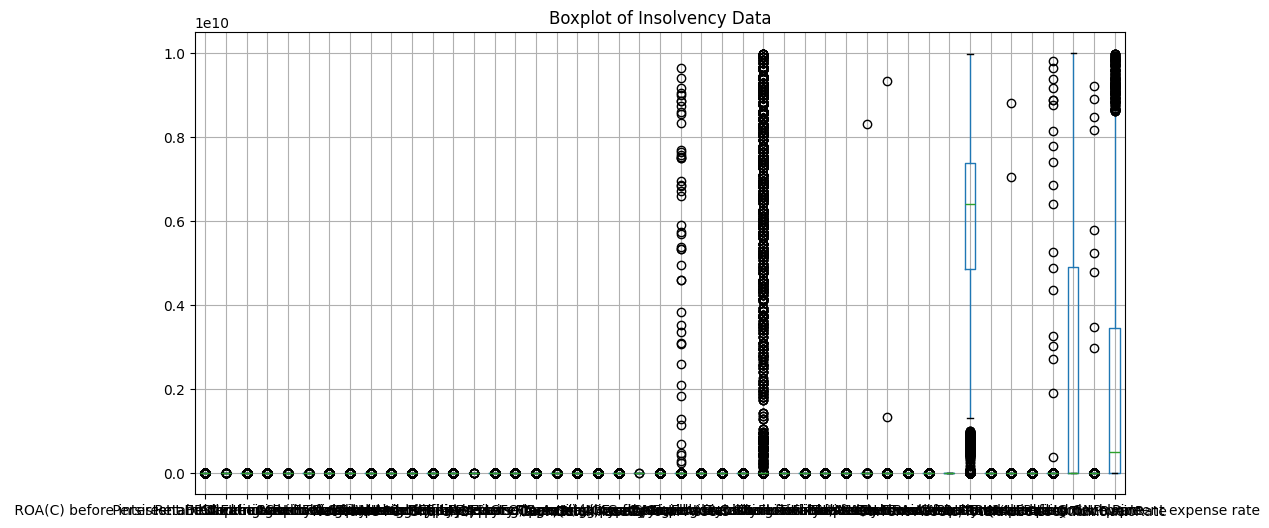

In [665]:
X.boxplot(figsize=(12,6))
plt.title("Boxplot of Insolvency Data")
plt.show()

In [666]:
# Scaling, scaling, scaling

from sklearn.metrics import f1_score

# Scale features from X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled2_df = pd.DataFrame(X_scaled, columns=X.columns)

In [667]:
# Testing the model
# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled2_df, y, test_size=0.2, random_state=42
)

    # Retrain the L2 model on the new training set
logreg_l2 = LogisticRegressionCV(
    Cs=[0.01, 0.05, 0.1, 0.5, 1], cv=5, penalty='l2', solver='lbfgs', scoring='roc_auc', max_iter=1000
)
logreg_l2.fit(X_train, y_train)
    
    # Evaluate on the test set
y_pred = logreg_l2.predict(X_test)
y_proba = logreg_l2.predict_proba(X_test)[:, 1]
    
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
  

[[1310    3]
 [  44    7]]


/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/enriqueestevezal

In [668]:
  
    # Training set predictions
y_train_pred = logreg_l2.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)
    
test_f1 = f1_score(y_test, y_pred)
    
print("Training F1-score:", train_f1)
print("Test F1-score:", test_f1)

print("Train columns:", list(X_train.columns))
print("Test columns:", list(X_test.columns))

Training F1-score: 0.16580310880829016
Test F1-score: 0.22950819672131148
Train columns: [' ROA(C) before interest and depreciation before interest', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Current Liability to Assets', ' Working Capital to Total Assets', " Net Income to Stockholder's Equity", ' Borrowing dependency', ' Current Liability to Current Assets', ' Net Value Per Share (B)', ' Current Liabilities/Equity', ' Working Capital/Equity', ' Operating Profit Per Share (Yuan ¥)', ' Liability-Assets Flag', ' Total expense/Assets', ' Equity to Long-term Liability', ' CFO to Assets', ' Tax rate (A)', ' Cash/Total Assets', ' Operating Gross Margin', ' Operating profit per person', ' Quick Assets/Total Assets', ' Equity to Liability', ' Cash/Current Liability', ' Cash Flow Per Share', ' Operating Funds to Liability', ' Inventory and accounts receivable/Net value', ' Fixed Assets Turnover Frequency', ' Cash flow rate', ' Cash Flow

/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [669]:
# Let's do regularisation

from sklearn.linear_model import LogisticRegressionCV

# Set up a range of C values
C_values = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]

logreg_cv = LogisticRegressionCV(
    Cs=C_values,
    cv=5,            
    penalty='l2',
    solver='lbfgs',
    scoring='roc_auc',
    max_iter=1000,
    random_state=42
)
logreg_cv.fit(X_train, y_train)


/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/enriqueestevezal

LogisticRegressionCV(Cs=[0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], cv=5,
                     max_iter=1000, random_state=42, scoring='roc_auc')

In [670]:

# Check results
print("Best C:", logreg_cv.C_[0])
print("C values tested:", logreg_cv.Cs_)
print("Mean CV scores for each C:")
for c, score in zip(logreg_cv.Cs_, logreg_cv.scores_[1].mean(axis=0)):
    print(f"C={c}: mean CV score={score:.4f}")

# The mean CV score is the average ROC-AUC score across all cross-validation folds for that C value.
# The higher, the better model performace.

y_train_pred = logreg_cv.predict(X_train)
y_test_pred = logreg_cv.predict(X_test)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training F1-score:", train_f1)
print("Test F1-score:", test_f1)

# We are keeping C = 0.01 as the good value since it gives the better score.

/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Best C: 0.001
C values tested: [1.e-03 1.e-02 5.e-02 1.e-01 5.e-01 1.e+00 5.e+00 1.e+01]
Mean CV scores for each C:
C=0.001: mean CV score=0.9199
C=0.01: mean CV score=0.9167
C=0.05: mean CV score=0.9150
C=0.1: mean CV score=0.9131
C=0.5: mean CV score=0.9024
C=1.0: mean CV score=0.9000
C=5.0: mean CV score=0.8957
C=10.0: mean CV score=0.8957
Training F1-score: 0.05649717514124294
Test F1-score: 0.0


/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [671]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1310    3]
 [  44    7]]


In [672]:
# Let's balance y

# I could use SMOTE, XGBoost or both. Let's compare

'''from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train2, y_train2)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Get best C from previous cross-validation
best_c = logreg_cv.C_[0]

# Train on balanced data
logreg_smote = LogisticRegression(
    C=best_c, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42
)
logreg_smote.fit(X_train_bal, y_train_bal)

# Predict on train and test sets
y_train_pred_bal = logreg_smote.predict(X_train_bal)
y_test_pred_bal = logreg_smote.predict(X_test2)

# Calculate F1-scores
train_f1_bal = f1_score(y_train_bal, y_train_pred_bal)
test_f1_bal = f1_score(y_test2, y_test_pred_bal)

print("Training F1-score (SMOTE):", train_f1_bal)
print("Test F1-score (SMOTE):", test_f1_bal)'''

'from imblearn.over_sampling import SMOTE\n\nsmote = SMOTE(random_state=42)\nX_train_bal, y_train_bal = smote.fit_resample(X_train2, y_train2)\n\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import f1_score\n\n# Get best C from previous cross-validation\nbest_c = logreg_cv.C_[0]\n\n# Train on balanced data\nlogreg_smote = LogisticRegression(\n    C=best_c, penalty=\'l2\', solver=\'lbfgs\', max_iter=1000, random_state=42\n)\nlogreg_smote.fit(X_train_bal, y_train_bal)\n\n# Predict on train and test sets\ny_train_pred_bal = logreg_smote.predict(X_train_bal)\ny_test_pred_bal = logreg_smote.predict(X_test2)\n\n# Calculate F1-scores\ntrain_f1_bal = f1_score(y_train_bal, y_train_pred_bal)\ntest_f1_bal = f1_score(y_test2, y_test_pred_bal)\n\nprint("Training F1-score (SMOTE):", train_f1_bal)\nprint("Test F1-score (SMOTE):", test_f1_bal)'

The F1-score is slightly better:
- Before feature selection:  
Training F1-score (SMOTE): 0.8869307114367869  
Test F1-score (SMOTE): 0.3049645390070922

In [673]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# XGBoost is a good option, since it can help paying more attention to the minority class with this ratio.

# Train XGBoost on original (unbalanced) training set
'''ratio = (y_train2 == 0).sum() / (y_train2 == 1).sum()
xgb = XGBClassifier(scale_pos_weight=ratio, random_state=42)
xgb.fit(X_train2, y_train2)

# Predict and evaluate
y_train_pred_xgb = xgb.predict(X_train2)
y_test_pred_xgb = xgb.predict(X_test2)

train_f1_xgb = f1_score(y_train2, y_train_pred_xgb)
test_f1_xgb = f1_score(y_test2, y_test_pred_xgb)

print("Training F1-score (XGBoost, no SMOTE):", train_f1_xgb)
print("Test F1-score (XGBoost, no SMOTE):", test_f1_xgb)'''



'ratio = (y_train2 == 0).sum() / (y_train2 == 1).sum()\nxgb = XGBClassifier(scale_pos_weight=ratio, random_state=42)\nxgb.fit(X_train2, y_train2)\n\n# Predict and evaluate\ny_train_pred_xgb = xgb.predict(X_train2)\ny_test_pred_xgb = xgb.predict(X_test2)\n\ntrain_f1_xgb = f1_score(y_train2, y_train_pred_xgb)\ntest_f1_xgb = f1_score(y_test2, y_test_pred_xgb)\n\nprint("Training F1-score (XGBoost, no SMOTE):", train_f1_xgb)\nprint("Test F1-score (XGBoost, no SMOTE):", test_f1_xgb)'

In [674]:
from imblearn.over_sampling import SMOTE

'''# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train2, y_train2)

# Train XGBoost on balanced data
xgb_smote = XGBClassifier(random_state=42)
xgb_smote.fit(X_train_bal, y_train_bal)

# Predict and evaluate
y_train_pred_xgb_smote = xgb_smote.predict(X_train_bal)
y_test_pred_xgb_smote = xgb_smote.predict(X_test2)

train_f1_xgb_smote = f1_score(y_train_bal, y_train_pred_xgb_smote)
test_f1_xgb_smote = f1_score(y_test, y_test_pred_xgb_smote)

print("Training F1-score (XGBoost + SMOTE):", train_f1_xgb_smote)
print("Test F1-score (XGBoost + SMOTE):", test_f1_xgb_smote)'''

'# Apply SMOTE to training set\nsmote = SMOTE(random_state=42)\nX_train_bal, y_train_bal = smote.fit_resample(X_train2, y_train2)\n\n# Train XGBoost on balanced data\nxgb_smote = XGBClassifier(random_state=42)\nxgb_smote.fit(X_train_bal, y_train_bal)\n\n# Predict and evaluate\ny_train_pred_xgb_smote = xgb_smote.predict(X_train_bal)\ny_test_pred_xgb_smote = xgb_smote.predict(X_test2)\n\ntrain_f1_xgb_smote = f1_score(y_train_bal, y_train_pred_xgb_smote)\ntest_f1_xgb_smote = f1_score(y_test, y_test_pred_xgb_smote)\n\nprint("Training F1-score (XGBoost + SMOTE):", train_f1_xgb_smote)\nprint("Test F1-score (XGBoost + SMOTE):", test_f1_xgb_smote)'

# We are not balancing data, since the results doesn't look valid.

The accuracy is high, because almost all the companies are "not bankrupt", and the F1-score is low because the dataset is really unbalanced.

In [675]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

# Using class_weight=balanced so it adjust weights inversely proportional to class frequencies.
# More weight to Y because it's highly unbalanced.

# Prepare features and target
y = c_insol['Bankrupt?']
X = c_insol.drop(columns=['Bankrupt?'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Fit logistic regression
logreg = LogisticRegression(class_weight='balanced', penalty='l2', solver='lbfgs', max_iter=10000, random_state=42)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Test F1-score:", f1_score(y_test, y_pred))

/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/enriqueestevezal

Confusion matrix:
 [[1481  487]
 [  44   34]]
Test F1-score: 0.11352253756260434


/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/enriqueestevezal

In [676]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

# Trying again with SMOTE

# Prepare features and target
X = c_insol.drop('Bankrupt?', axis=1)
y = c_insol['Bankrupt?']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Fit logistic regression on balanced data
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100000, random_state=42)
logreg.fit(X_train_bal, y_train_bal)

# Predict and evaluate
y_pred = logreg.predict(X_test)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Test F1-score (SMOTE):", f1_score(y_test, y_pred))

/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: inval

Confusion matrix:
 [[1527  441]
 [  41   37]]
Test F1-score (SMOTE): 0.13309352517985612


/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [677]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

# Ttrying undersampling and oversampling.

# Prepare features and target
X = c_insol.drop('Bankrupt?', axis=1)
y = c_insol['Bankrupt?']

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Apply random undersampling to balance the training set
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Fit logistic regression on undersampled data
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train_under, y_train_under)

# Predict and evaluate on validation set
y_pred = logreg.predict(X_val)
print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))
print("Validation F1-score (undersampling):", f1_score(y_val, y_pred))

Confusion matrix:
 [[1468  500]
 [  44   34]]
Validation F1-score (undersampling): 0.1111111111111111


/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overfl

In [678]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

# Prepare features and target
X = c_insol.drop('Bankrupt?', axis=1)
y = c_insol['Bankrupt?']

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Apply random oversampling to balance the training set
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

# Fit logistic regression on oversampled data
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train_over, y_train_over)

# Predict and evaluate on validation set
y_pred = logreg.predict(X_val)
print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))
print("Validation F1-score (oversampling):", f1_score(y_val, y_pred))

/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overfl

Confusion matrix:
 [[1451  517]
 [  44   34]]
Validation F1-score (oversampling): 0.10810810810810811


/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


The score with logistic regression is really low, so I will try an alternative model.

With SMOTE, undersampling and oversampling the F1-score and the confusion matrix are not changing, so the problem is not in the y feature.

Let's try other methods.

In [679]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

# Prepare features and target
X = c_insol.drop('Bankrupt?', axis=1)
y = c_insol['Bankrupt?']

# Split data into train, validation, and test sets (60% train, 20% val, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Fit Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate on validation set
y_val_pred = rf.predict(X_val)
print("Validation Confusion matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Validation F1-score:", f1_score(y_val, y_val_pred))

# Predict and evaluate on test set
y_test_pred = rf.predict(X_test)
print("Test Confusion matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Test F1-score:", f1_score(y_test, y_test_pred))

Validation Confusion matrix:
 [[1320    5]
 [  30    9]]
Validation F1-score: 0.33962264150943394
Test Confusion matrix:
 [[1309    3]
 [  44    8]]
Test F1-score: 0.25396825396825395


With Random Forest the result is better.

In [680]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

# Prepare features and target
X = c_insol.drop('Bankrupt?', axis=1)
y = c_insol['Bankrupt?']

# Split data into train, validation, and test sets (60% train, 20% val, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Handle class imbalance
ratio = (y_train == 0).sum() / (y_train == 1).sum()

# Fit XGBoost model
xgb = XGBClassifier(scale_pos_weight=ratio, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predict and evaluate on validation set
y_val_pred = xgb.predict(X_val)
print("Validation Confusion matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Validation F1-score:", f1_score(y_val, y_val_pred))

# Predict and evaluate on test set
y_test_pred = xgb.predict(X_test)
print("Test Confusion matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Test F1-score (XGBoost):", f1_score(y_test, y_test_pred))

/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Confusion matrix:
 [[1312   13]
 [  27   12]]
Validation F1-score: 0.375
Test Confusion matrix:
 [[1296   16]
 [  29   23]]
Test F1-score (XGBoost): 0.5054945054945055


In [681]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Prepare features and target
X = c_insol.drop('Bankrupt?', axis=1)
y = c_insol['Bankrupt?']

# Handle class imbalance
ratio = (y == 0).sum() / (y == 1).sum()

# Create XGBoost model
xgb = XGBClassifier(scale_pos_weight=ratio, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform 5-fold cross-validation using F1-score
cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='f1')

print("Cross-validated F1 scores:", cv_scores)
print("Mean F1 score:", cv_scores.mean())

/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/

Cross-validated F1 scores: [0.47368421 0.17105263 0.51282051 0.46753247 0.35483871]
Mean F1 score: 0.39598570642713254


In [682]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

X = c_insol.drop('Bankrupt?', axis=1)
y = c_insol['Bankrupt?']
ratio = (y == 0).sum() / (y == 1).sum()

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'scale_pos_weight': [ratio]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': np.float64(29.995454545454546)}
Best F1 score: 0.4036676971041482


In [683]:
# After running GridSearchCV, get the best parameters
best_params = grid_search.best_params_

# Create a new XGBClassifier with the best parameters
xgb_best = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model on your data
xgb_best.fit(X, y)

# Now you can use xgb_best for predictions or cross-validation
cv_scores = cross_val_score(xgb_best, X, y, cv=10, scoring='f1')
print("Cross-validated F1 scores:", cv_scores)
print("Mean F1 score:", cv_scores.mean())

/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/

Cross-validated F1 scores: [0.43137255 0.39285714 0.32653061 0.2295082  0.31578947 0.46153846
 0.48648649 0.45714286 0.54054054 0.57894737]
Mean F1 score: 0.4220713688656568


I used GridSearchCV in order to look for the best parameters for using them in my XGBoost model, the one that gave the best result. 

Now, I am going to try with RandomizedSeachCV.

In [684]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, confusion_matrix

X = c_insol.drop('Bankrupt?', axis=1)
y = c_insol['Bankrupt?']
ratio = (y == 0).sum() / (y == 1).sum()

param_dist = {
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [ratio]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=42
)
random_search.fit(X, y)

print("Best parameters:", random_search.best_params_)
print("Best F1 score:", random_search.best_score_)

# Fit XGBoost with best parameters
xgb_best = XGBClassifier(**random_search.best_params_, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X, y)

# Example: cross-validation or predictions
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xgb_best, X, y, cv=10, scoring='f1')
print("Cross-validated F1 scores:", cv_scores)
print("Mean F1 score:", cv_scores.mean())


/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/

Best parameters: {'subsample': 1.0, 'scale_pos_weight': np.float64(29.995454545454546), 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best F1 score: 0.41795250361329667


/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/

Cross-validated F1 scores: [0.43589744 0.41975309 0.27906977 0.23376623 0.35087719 0.39285714
 0.41666667 0.40816327 0.56       0.61016949]
Mean F1 score: 0.41072202828630944


In [685]:
print(list(X.columns))

[' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Tota

## The result is a bit better, so I go with it.

In [686]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix

# Predict probabilities and classes
y_pred = xgb_best.predict(X)
y_proba = xgb_best.predict_proba(X)[:, 1]

# Calculate metrics
roc_auc = roc_auc_score(y, y_proba)
f1 = f1_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

print("ROC-AUC:", roc_auc)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion matrix:\n", cm)

ROC-AUC: 0.9996666161539627
F1-score: 0.7051282051282052
Precision: 0.5445544554455446
Recall: 1.0
Confusion matrix:
 [[6415  184]
 [   0  220]]


In [687]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Split data: 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Fit the last XGBoost model
xgb_best.fit(X_train, y_train)

# Predict and calculate F1-score for each set
train_f1 = f1_score(y_train, xgb_best.predict(X_train))
val_f1 = f1_score(y_val, xgb_best.predict(X_val))
test_f1 = f1_score(y_test, xgb_best.predict(X_test))

print("Train F1-score:", train_f1)
print("Validation F1-score:", val_f1)
print("Test F1-score:", test_f1)

Train F1-score: 0.8037383177570093
Validation F1-score: 0.4329896907216495
Test F1-score: 0.49230769230769234


/Users/enriqueestevezalvarez/Documents/Ironhack/Projects/Insolvency/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [688]:
import pickle
pickle.dump(xgb_best, open("xgb_best_model.pkl", "wb"))

The final result using XGBoost with RandomizedSeachCV:

ROC-AUC: 0.9996666161539627  
F1-score: 0.7051282051282052  
Precision: 0.5445544554455446   
Recall: 1.0  
Confusion matrix:  
 [[6415  184]  
 [   0  220]]  
  
Train F1-score: 0.8037383177570093  
Validation F1-score: 0.4329896907216495  
Test F1-score: 0.49230769230769234  

----